https://financedata.github.io/posts/finance-data-reader-users-guide.html

# 패키지 설치

아래 세 종류의 패키지 알아봤는데, finance-datareader 사용하면 될 듯

In [5]:
# !pip install finance-datareader, pykrx, yfinance

# 종목 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

# OHLC (Open, High, Low, Close)
from mpl_finance import candlestick2_ohlc

c:\Users\ENURI\anaconda3\Lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
!pip install --upgrade mplfinance

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.4 MB/s eta 0:00:00


In [40]:
# 코스피 상위 10개 종목 확인
kospi_list_df = fdr.StockListing('KOSPI')[:10]
display(kospi_list_df)

nasdaq_list_df = fdr.StockListing('NASDAQ')[:10]
display(nasdaq_list_df)

# 암호화폐의 경우, 종목 리스트 조회 기능은 따로 없는 것 같고,
# 지원 심볼: ['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'BUSD', 'ADA', 'SOL', 'DOGE']
# 위 리스트 데이터만 제공하는 듯 - 대표적인 비트코인, 이더리움, 맆ㄹ 정도만 조회 해보겠음

# 암호화폐의 국내 / 미국 가격 차이를 비교하기 위해선 환율 정보도 필요하므로, 환율 데이터도 로드
# 환율 심볼: 'USD/KRW'

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,79900,3,0,0.00,79200,80000,79200,6795302,540844592900,476985625745000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,180500,1,3900,2.21,176700,181400,175600,1874166,336222405000,131404426882500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,407500,1,1500,0.37,406000,412500,406000,45987,18815487500,95355000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,834000,1,6000,0.72,828000,835000,827000,9478,7874377000,59359116000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,66700,1,100,0.15,66600,66800,66200,279827,18633056500,54886542890000,822886700,STK
5,005380,KR7005380001,현대차,KOSPI,,244000,1,3500,1.46,241000,245500,240500,207752,50578921500,51613687464000,211531506,STK
6,000270,KR7000270009,기아,KOSPI,,113800,2,-600,-0.52,114400,115000,112900,371147,42211395000,45752630301400,402044203,STK
7,068270,KR7068270008,셀트리온,KOSPI,,184000,2,-2400,-1.29,184500,186000,183200,168960,31144323900,40121156208000,218049762,STK
8,005490,KR7005490008,POSCO홀딩스,KOSPI,,430500,1,1500,0.35,429000,432000,428500,109461,47075932000,36407914515000,84571230,STK
9,006400,KR7006400006,삼성SDI,KOSPI,,484000,1,11000,2.33,477000,491500,476500,294282,142706993500,33282032520000,68764530,STK


100%|████████████████████████████████████████████████████████████████████████████| 3816/3816 [00:03<00:00, 1145.46it/s]


,Symbol,Name,IndustryCode,Industry
0,MSFT,Microsoft Corp,57201020,소프트웨어
1,AAPL,Apple Inc,57106020,전화 및 소형 장치
2,NVDA,NVIDIA Corp,57101010,반도체
3,AMZN,Amazon.com Inc,53402010,백화점
4,META,Meta Platforms Inc,57201030,온라인 서비스
5,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스
6,GOOG,Alphabet Inc Class C,57201030,온라인 서비스
7,AVGO,Broadcom Inc,57101010,반도체
8,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조
9,ASML,ASML Holding NV ADR,57101020,반도체 장비 및 테스트


# 개별종목 데이터 확인

### 국내 주식

In [50]:
stock_dic = {}
year_from = '2023'
crypto_code_list = ['BTC', 'ETH', 'XRP']

# KOSPI 주가 데이터
for _, row in kospi_list_df.iterrows():
    print(row['Code'], row['Name'])
    
    s_df = fdr.DataReader(row['Code'], year_from)
    stock_dic[row['Name']] = s_df
    
# NASDAQ 주가 데이터
for _, row in nasdaq_list_df.iterrows():
    print(row['Symbol'], row['Name'])
    
    s_df = fdr.DataReader(row['Symbol'], year_from)
    stock_dic[row['Name']] = s_df
    
# 암호화폐 데이터
for symbol in crypto_code_list:
    print(symbol)
    
    for c in ['KRW', 'USD']:
        code = f'{symbol}/{c}'
        
        s_df = fdr.DataReader(code, year_from)
        stock_dic[code] = s_df

# 달러 환율 데이터
ex_df = fdr.DataReader('USD/KRW', year_from)

005930 삼성전자
000660 SK하이닉스
373220 LG에너지솔루션
207940 삼성바이오로직스
005935 삼성전자우
005380 현대차
000270 기아
068270 셀트리온
005490 POSCO홀딩스
006400 삼성SDI
MSFT Microsoft Corp
AAPL Apple Inc
NVDA NVIDIA Corp
AMZN Amazon.com Inc
META Meta Platforms Inc
GOOGL Alphabet Inc Class A
GOOG Alphabet Inc Class C
AVGO Broadcom Inc
TSLA Tesla Inc
ASML ASML Holding NV ADR
BTC
ETH
XRP


(<matplotlib.collections.LineCollection at 0x21231e272d0>,
 <matplotlib.collections.PolyCollection at 0x21231e6db90>)

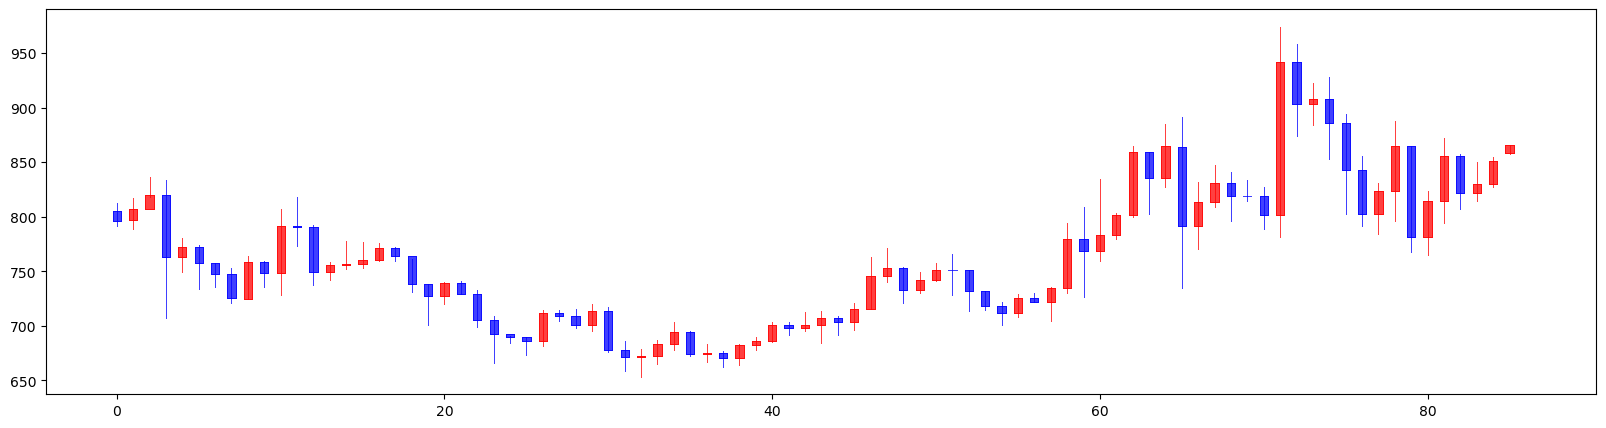

In [29]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'],
                  width = 0.5, colorup = 'r', colordown = 'b')